# MNIST Fashion Image Classification

In [1]:
import pandas as pd
import keras  
import tensorflow as tf

tf.config.list_physical_devices('GPU')

2023-04-01 11:30:47.223498: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


[]

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (valid_images, valid_labels) = fashion_mnist.load_data()

#### The classification classes:

0: T-shirt/top </br>
1: Trouser </br>
2: Pullover </br>
3: Dress </br>
4: Coat </br>
5: Sandal </br>
6: Shirt </br>
7: Sneaker </br>
8: Bag </br>
9: Ankle boot

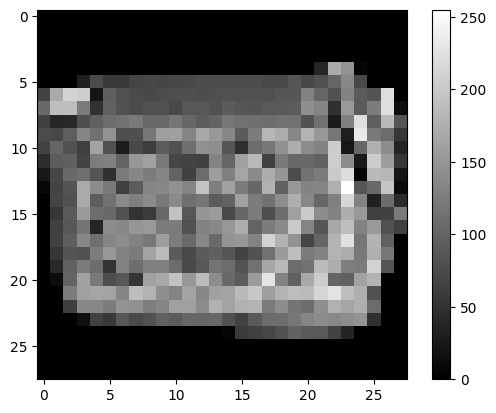

In [5]:
import matplotlib.pyplot as plt

data_idx = 3523

plt.figure()
plt.imshow(train_images[data_idx], cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()

In [12]:
train_labels[data_idx]

8

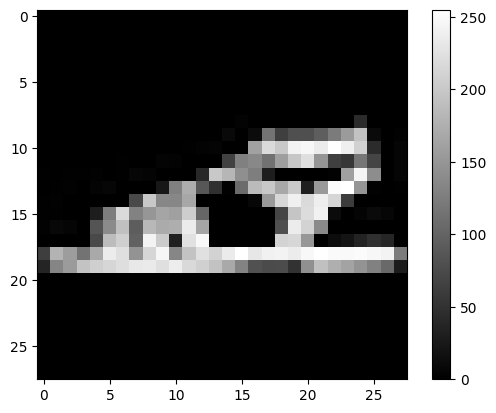

In [13]:
data_idx = 532

plt.figure()
plt.imshow(valid_images[data_idx], cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()

In [14]:
valid_labels[data_idx]

5

In [15]:
valid_images[data_idx]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [16]:
number_of_classes = train_labels.max() + 1 
number_of_classes

10

In [17]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(number_of_classes)
])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [19]:
image_height = 28
image_width = 28

number_of_weights = image_height * image_width * number_of_classes
number_of_weights

7840

In [21]:
tf.keras.utils.plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [22]:
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy']
             )

In [24]:
history = model.fit(
    train_images,
    train_labels,
    epochs=5,
    verbose=True,
    validation_data=(valid_images, valid_labels)
)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 16.9615 - accuracy: 0.7409 - val_loss: 19.5885 - val_accuracy: 0.7096
Epoch 2/5
1875/1875 [==============================] - 2s 889us/step - loss: 12.4826 - accuracy: 0.7869 - val_loss: 12.5862 - val_accuracy: 0.7777
Epoch 3/5
1875/1875 [==============================] - 2s 908us/step - loss: 11.0583 - accuracy: 0.7946 - val_loss: 11.4361 - val_accuracy: 0.7836
Epoch 4/5
1875/1875 [==============================] - 2s 915us/step - loss: 10.7455 - accuracy: 0.7982 - val_loss: 10.2907 - val_accuracy: 0.8127
Epoch 5/5
1875/1875 [==============================] - 2s 901us/step - loss: 10.4186 - accuracy: 0.8015 - val_loss: 14.0897 - val_accuracy: 0.7853


In [25]:
model.predict(train_images[0:10])

1/1 [==============================] - 0s 80ms/step


array([[-2.79848938e+02, -4.85016083e+02, -1.01717010e+02,
        -2.44290817e+02, -2.97865631e+02,  3.08950684e+02,
        -2.73829460e+01,  3.88902130e+02,  6.64977417e+01,
         3.96308624e+02],
       [ 4.13941772e+02, -1.74116989e+02,  2.06633453e+02,
         1.72707642e+02, -5.57305679e+01, -1.25057483e+03,
         2.68711761e+02, -1.98956177e+03, -2.01943680e+02,
        -1.00725580e+03],
       [ 9.00397263e+01,  3.80821490e+00,  4.73382187e+01,
         1.12729118e+02,  5.37493019e+01, -5.09099579e+02,
         8.16614838e+01, -5.10836090e+02, -1.20958992e+02,
        -3.86960327e+02],
       [ 1.67879990e+02, -1.28767896e+00,  1.12808769e+02,
         1.92855942e+02,  6.31983452e+01, -7.58931152e+02,
         1.79773819e+02, -1.11778650e+03, -1.72940277e+02,
        -8.63042175e+02],
       [ 1.27354462e+02,  2.47393894e+01,  1.99623489e+01,
         1.96740677e+02,  7.13014526e+01, -9.56015442e+02,
         7.94433746e+01, -7.20199890e+02, -1.52856842e+02,
        -1.

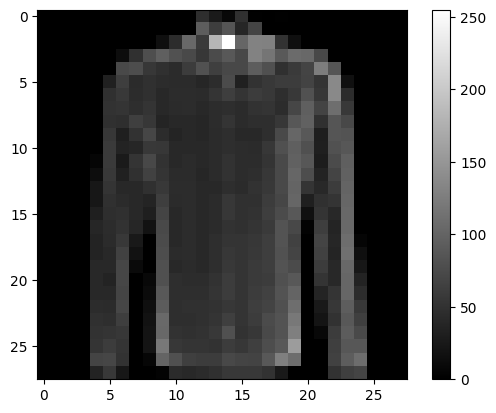

1/1 [==============================] - 0s 20ms/step


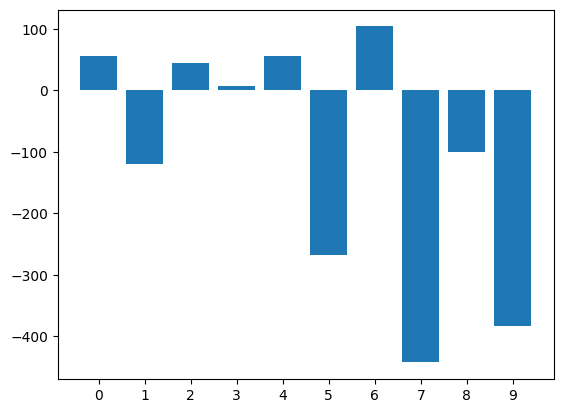

correct answer:  6


In [26]:
data_idx=7432

plt.figure()
plt.imshow(train_images[data_idx], cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()

x_values = range(number_of_classes)
plt.figure()
plt.bar(x_values, model.predict(train_images[data_idx:data_idx+1]).flatten())
plt.xticks(range(10))
plt.show()

print('correct answer: ', train_labels[data_idx])